In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import requests, json, io, time, os, tqdm
from PIL import Image

In [2]:
dog_api = 'https://dog.ceo/api/breeds/image/random'
cat_api = 'https://api.thecatapi.com/v1/images/search'

img_size = (64, 64)

In [3]:
total_dog_images = max([int(i[8:-4]) for i in os.listdir(f"fetched_data_3/dogs")]) + 1
total_cat_images = max([int(i[8:-4]) for i in os.listdir(f"fetched_data_3/cats")]) + 1
print("Total Cat Images:", total_cat_images)
print("Total Dog Images:", total_dog_images)

Total Cat Images: 2475
Total Dog Images: 3002


In [4]:
# FETCHING IMAGES

parent_dir = "fetched_data_3/"
anim = "cat"
anim = "dog"
n_of_images = 100
for anim, n_of_images in (('cat', 500), ('dog', 0)):
	
	start_with_index = max([int(i[8:-4]) for i in os.listdir(parent_dir + anim + "s")]) + 1

	for i in tqdm.tqdm(range(start_with_index, start_with_index+n_of_images)):
		time_i = time.time()

		try:
			if anim == "dog":
				img_url = json.loads(requests.get(dog_api).content)['message']
			else:
				img_url = json.loads(requests.get(cat_api).content)[0]['url']
		except:
			# print("Could not Complete")
			continue

		# with Image.open(io.BytesIO(requests.get(img_url).content)) as im:
		# 	im.save('dog'+str(i)+".png")
		img = tf.keras.preprocessing.image.load_img(
			io.BytesIO(requests.get(img_url).content),
			target_size=img_size,
		)
		tf.keras.preprocessing.image.save_img(
			f"{parent_dir + anim}s/{anim}_fet_{i}.jpg",
			img,
		)

		# print(f"fetched image {i} in %.2f seconds"%(time.time()-time_i))

total_dog_images = max([int(i[8:-4]) for i in os.listdir(f"{parent_dir}dogs")])
total_cat_images = max([int(i[8:-4]) for i in os.listdir(f"{parent_dir}cats")])
print("Total Cat Images:", total_cat_images)
print("Total Dog Images:", total_dog_images)

 46%|████▌     | 365/800 [25:31<30:24,  4.19s/it]  


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [5]:
np.random.randint(0, 1000)

3011

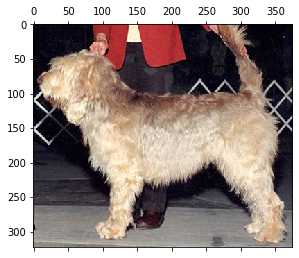

In [11]:
img_url = json.loads(requests.get(dog_api).content)['message']
img = tf.keras.preprocessing.image.load_img(
	io.BytesIO(requests.get(img_url).content),
	# target_size=(200, 200),
)
plt.matshow(img)

In [12]:
img_url = json.loads(requests.get(dog_api).content)['message']

In [22]:
img = tf.keras.preprocessing.image.load_img(
	io.BytesIO(requests.get(img_url).content),
	# target_size=(72, 72),
)

'dog_993_500x357.jpg'

In [ ]:
img.resize()

In [15]:
img = tf.keras.preprocessing.image.load_img(
	io.BytesIO(requests.get(img_url).content),
	target_size = model.input_shape[1:-1],
)
tf.keras.preprocessing.image.save_img(
	f"loaded_images/dog/dog_{np.random.randint(0, 1000)}_{img.size[0]}x{img.size[1]}.jpg",
	img,
)

In [3]:
model = tf.keras.models.load_model("model_85.9.h5")

In [4]:
# GETTING CORRECT DOG IMAGES
 
i = 0
while i<20:
	img_url = json.loads(requests.get(dog_api).content)['message']

	img = tf.keras.preprocessing.image.load_img(
		io.BytesIO(requests.get(img_url).content),
	)
	img_resized = img.resize(model.input_shape[1:-1])
	img_resized = np.array(img_resized)
	img_resized = np.expand_dims(img_resized, axis=0)
	img_resized = img_resized / 255.
	pred = model.predict(img_resized)[0, 0]
	if pred > 0.5:
		tf.keras.preprocessing.image.save_img(
			f"loaded_images/dog/dog_true/dog_{i}.jpg",
			img,
		)
		i += 1


1/1 [==============================] - 0s 31ms/step


In [5]:
# GETTING FALSE DOG IMAGES
 
i = 0
while i<20:
	img_url = json.loads(requests.get(dog_api).content)['message']

	img = tf.keras.preprocessing.image.load_img(
		io.BytesIO(requests.get(img_url).content),
	)
	img_resized = img.resize(model.input_shape[1:-1])
	img_resized = np.array(img_resized)
	img_resized = np.expand_dims(img_resized, axis=0)
	img_resized = img_resized / 255.
	pred = model.predict(img_resized)[0, 0]
	if pred < 0.5:
		tf.keras.preprocessing.image.save_img(
			f"loaded_images/dog/dog_false/dog_{i}.jpg",
			img,
		)
		i += 1


1/1 [==============================] - 0s 31ms/step


In [6]:
# GETTING CORRECT cat IMAGES
 
# import json, requests
i = 0
while i<20:
	img_url = json.loads(requests.get(cat_api).content)[0]['url']

	img = tf.keras.preprocessing.image.load_img(
		io.BytesIO(requests.get(img_url).content),
	)
	img_resized = img.resize(model.input_shape[1:-1])
	img_resized = np.array(img_resized)
	img_resized = np.expand_dims(img_resized, axis=0)
	img_resized = img_resized / 255.
	pred = model.predict(img_resized)[0, 0]
	if pred < 0.5:
		tf.keras.preprocessing.image.save_img(
			f"loaded_images/cat/cat_true/cat_{i}.jpg",
			img,
		)
		i += 1


1/1 [==============================] - 0s 47ms/step


In [7]:
# GETTING FALSE cat IMAGES
 
i = 0
while i<20:
	img_url = json.loads(requests.get(cat_api).content)[0]['url']

	img = tf.keras.preprocessing.image.load_img(
		io.BytesIO(requests.get(img_url).content),
	)
	img_resized = img.resize(model.input_shape[1:-1])
	img_resized = np.array(img_resized)
	img_resized = np.expand_dims(img_resized, axis=0)
	img_resized = img_resized / 255.
	pred = model.predict(img_resized)[0, 0]
	if pred < 0.5:
		tf.keras.preprocessing.image.save_img(
			f"loaded_images/cat/cat_false/cat_{i}.jpg",
			img,
		)
		i += 1


1/1 [==============================] - 0s 44ms/step


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)       

In [1]:
img_url = "https://cdn.britannica.com/39/7139-050-A88818BB/Himalayan-chocolate-point.jpg"


In [5]:
import requests
import tensorflow as tf
import io

io.BytesIO(requests.get(img_url).content)
# tf.keras.preprocessing.image.load_img(img_url)